### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier

#%matplotlib inline

### Digits dataset

#### Load and examine the data

In [2]:
# 讀取 wine 資料集
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [3]:
print(f"Unique target values in the dataset = {np.unique(digits.target)}")
np.bincount(digits.target)

Unique target values in the dataset = [0 1 2 3 4 5 6 7 8 9]


array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

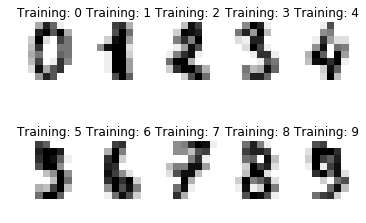

In [4]:
# 將觀測值與目標值放入一個 list
images_and_labels = list(zip(digits.images, digits.target))

# list 中的每個元素
for i, (image, label) in enumerate(images_and_labels[:10]):
    # 在 i + 1 的位置初始化子圖形
    plt.subplot(2, 5, i + 1)
    # 關掉子圖形座標軸刻度
    plt.axis('off')
    # 顯示圖形，色彩選擇灰階
    plt.imshow(image, cmap = plt.cm.binary)
    # 加入子圖形的標題
    plt.title('Training: ' + str(label))

# 顯示圖形
plt.show()

#### Logistics regression - baseline

In [5]:
# 切分訓練集/測試集
Ｘ_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.1, random_state=3)

# 建立模型
rm = linear_model.LogisticRegression()

# 訓練模型
rm.fit(X_train, y_train)

# 預測測試集
y_pred = rm.predict(X_test)

/Users/alfred/anaconda3/envs/ML100-Days/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alfred/anaconda3/envs/ML100-Days/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [6]:
# 預測值與實際值的差距
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9722222222222222


#### Gradient Boosting Machine

In [7]:
# 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.1, random_state=0)

# 建立模型
clf = GradientBoostingClassifier(loss="deviance", learning_rate=0.1, n_estimators=100)

# 將訓練資料丟進去模型訓練
clf.fit(X_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = clf.predict(X_test)

In [8]:
# 預測值與實際值的差距
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9666666666666667
